<a href="https://colab.research.google.com/github/YagneshMangali/Fraud-Detection-in-Financial-Transactions/blob/main/Fraud_Detection_in_Financial_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Fraud Detection/Fraud.csv')

# Display the dataframe
print(df)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [4]:
print(df.shape)

(6362620, 11)


In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5522948,380,PAYMENT,6914.67,C1321674943,0.0,0.00,M502485643,0.00,0.00,0,0
1037831,94,TRANSFER,1060171.45,C381624319,0.0,0.00,C898955098,1952871.32,3013042.77,0,0
361142,17,PAYMENT,1191.49,C588312155,0.0,0.00,M1361653860,0.00,0.00,0,0
4334074,308,PAYMENT,15586.08,C1047594066,0.0,0.00,M80778401,0.00,0.00,0,0
1825524,163,CASH_OUT,29539.77,C572053349,156347.0,126807.23,C993939358,0.00,29539.77,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#checking how many frauds are there

df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


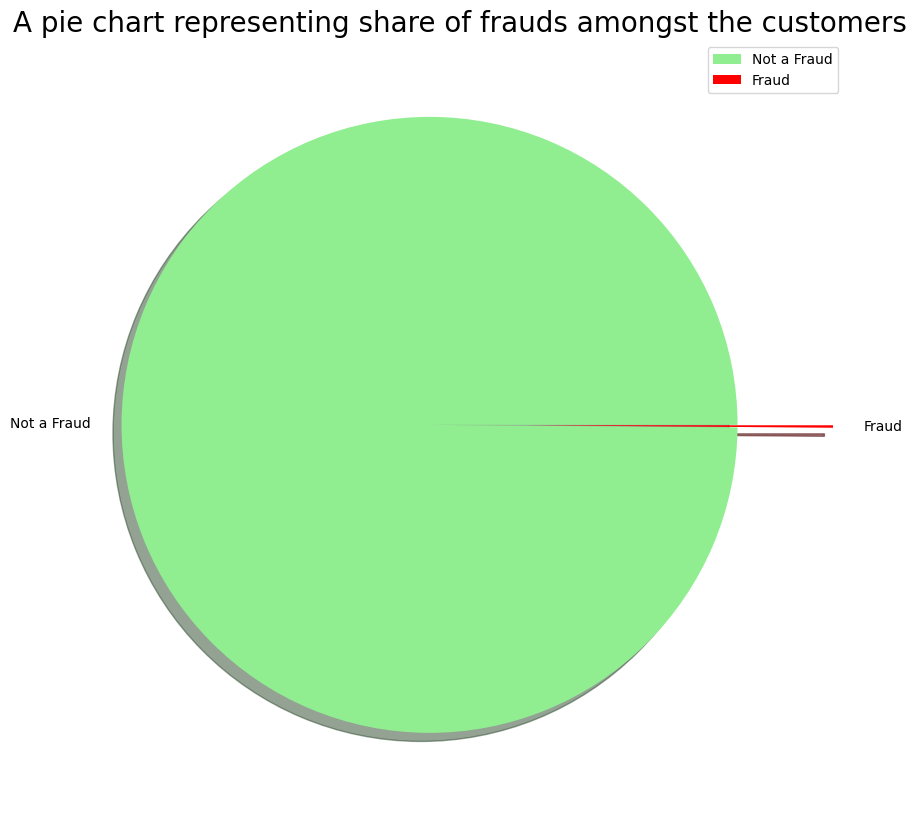

In [9]:
labels = ['Not a Fraud', 'Fraud']
colors = ['lightgreen', 'red']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [10]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


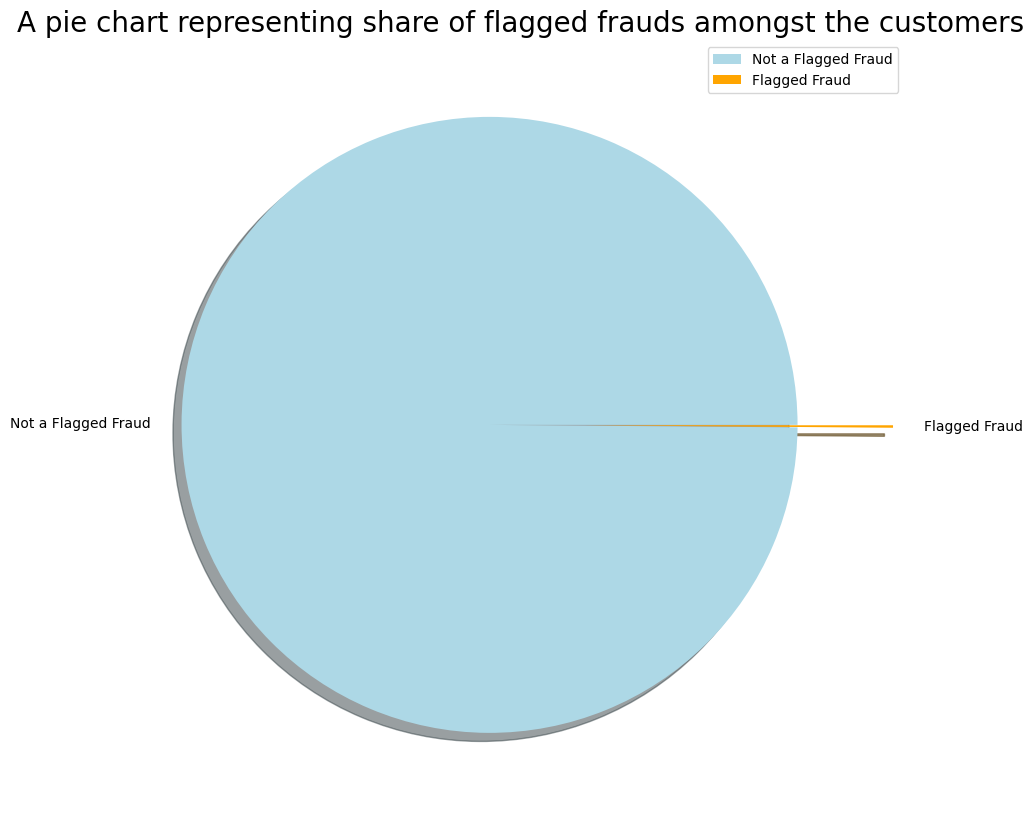

In [11]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'orange']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [12]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


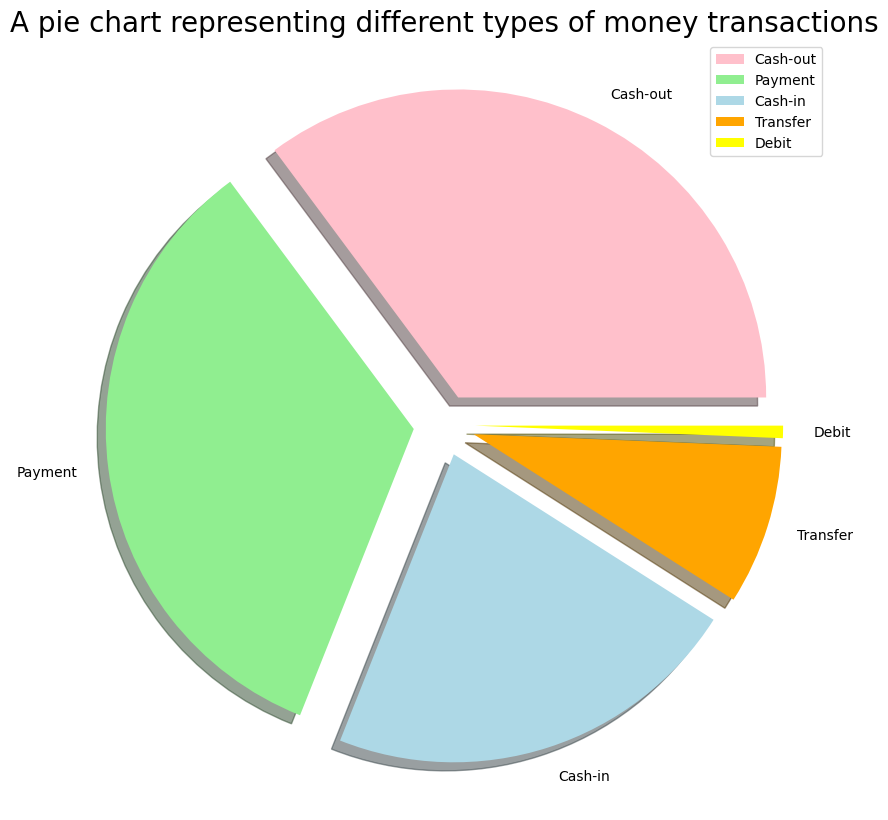

In [13]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [14]:
# checking the different types of steps involved in transactions

x = df['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 428


<ipython-input-15-e2ac24929c21>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step, fit = norm, kde = False)


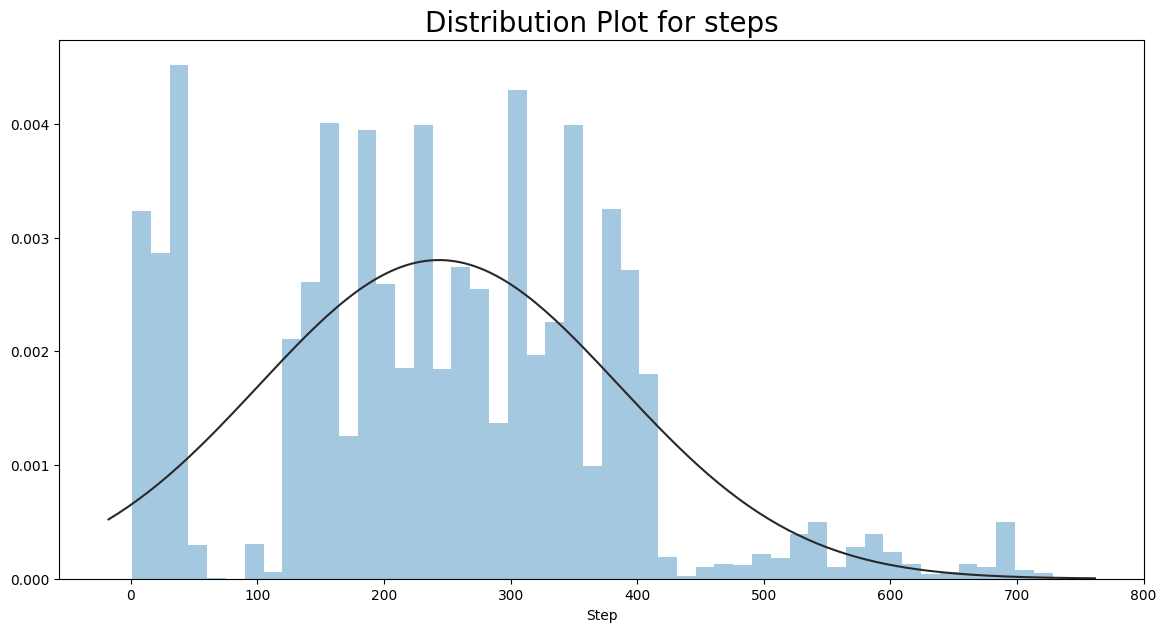

In [15]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

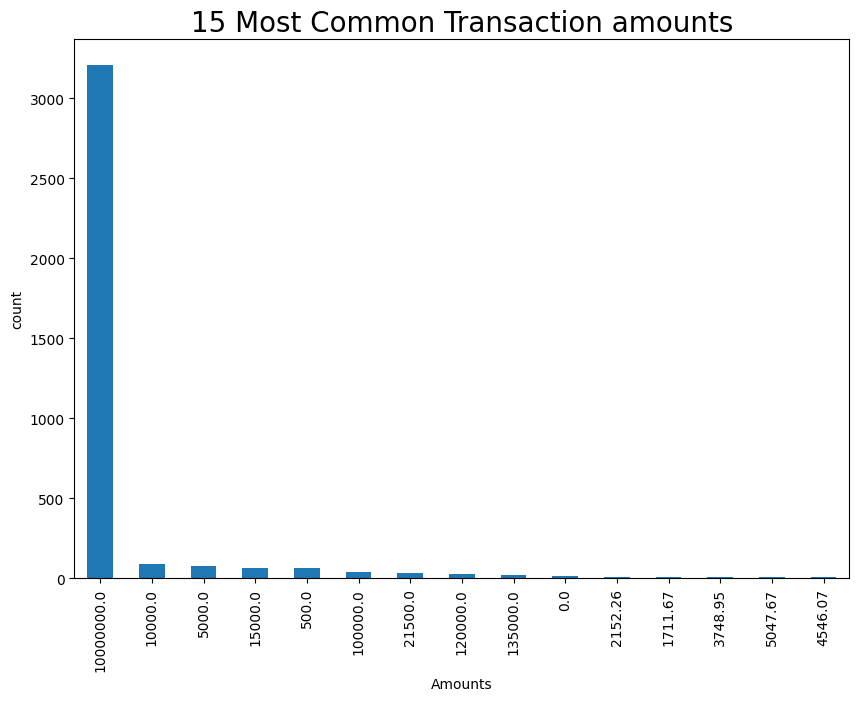

In [16]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

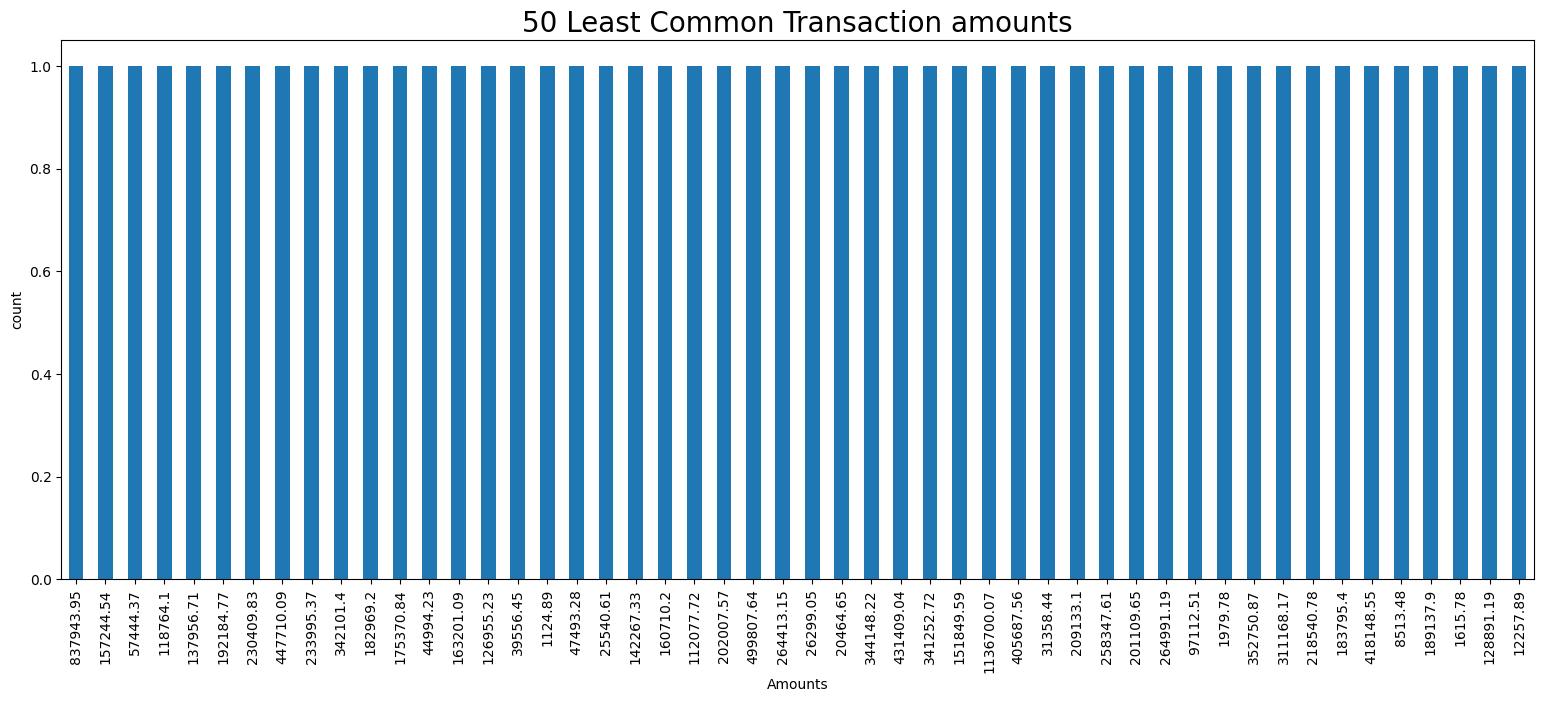

In [17]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

df['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

<ipython-input-18-bb577c85ec2f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.amount)


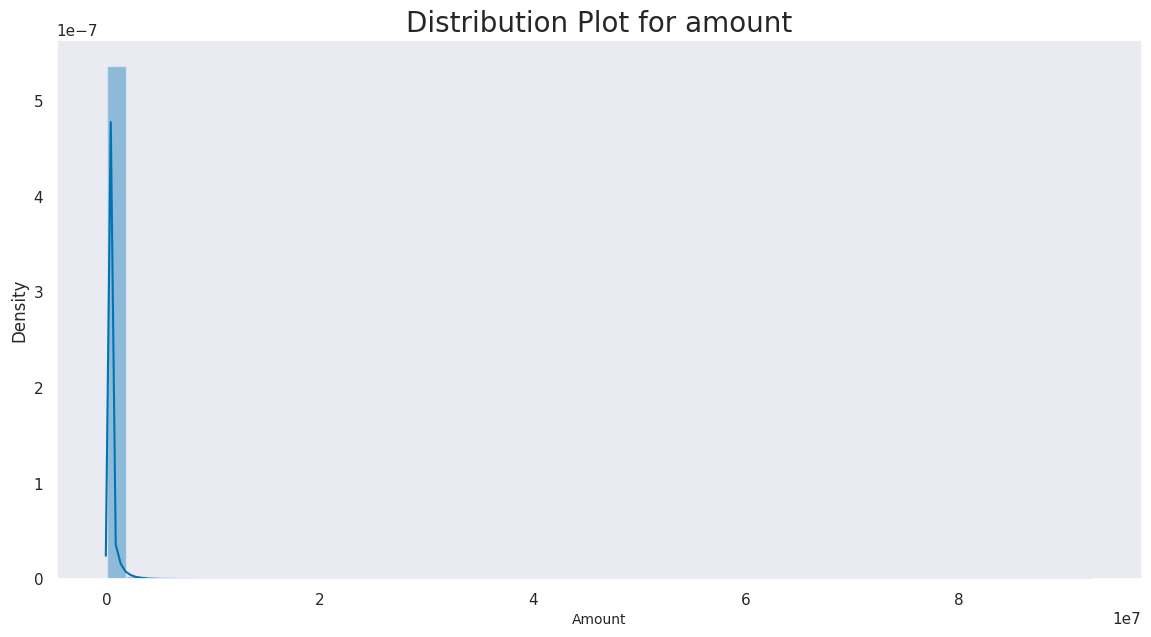

In [18]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(df.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [19]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)) )


The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [20]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [21]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [22]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [23]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [24]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = df.loc[(df.isFlaggedFraud == 0) & (df.oldbalanceDest == 0) & (df.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
5           1   PAYMENT     7817.71    C90045638       53860.00   
...       ...       ...         ...          ...            ...   
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0   

**Dataset where only Transfer Transactions are**

In [25]:
# defining a dataset containing only transfer type of transactions

dataTransfer = df.loc[df['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


**Minimum Original old Balance for Flagged Frauds**

In [26]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


**Maximum Original Balance for Flagged Frauds**

In [27]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


**Minimum Original Old Balace for non-Flagged Frauds**

In [28]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
160646,12,TRANSFER,342317.15,C2070529657,0.00,0.0,C621118463,0.0,0.0,0,0
957368,44,TRANSFER,133711.48,C256147273,0.00,0.0,C1582233295,0.0,0.0,0,0
1248,1,TRANSFER,271161.74,C1658487789,0.00,0.0,C1219161283,0.0,0.0,0,0
175828,12,TRANSFER,18931.59,C257351690,0.00,0.0,C1108098323,0.0,0.0,0,0
282796,15,TRANSFER,421255.41,C1734485985,0.00,0.0,C981307359,0.0,0.0,0,0
381356,17,TRANSFER,630315.29,C2126290948,22.00,0.0,C1203344902,0.0,0.0,0,0
4965641,351,TRANSFER,63.80,C1293504491,63.80,0.0,C1368130863,0.0,0.0,1,0
277265,15,TRANSFER,119.00,C1995557473,119.00,0.0,C1480876722,0.0,0.0,1,0
6281815,653,TRANSFER,119.65,C1497766467,119.65,0.0,C543477940,0.0,0.0,1,0
1796322,162,TRANSFER,151.00,C1172437299,151.00,0.0,C315826176,0.0,0.0,1,0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [29]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996403,425,TRANSFER,10000000.0,C1619838170,39585040.37,29585040.37,C1934167334,0.0,0.0,1,0
6281476,646,TRANSFER,10000000.0,C130070267,40399045.08,30399045.08,C970791522,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
5563705,387,TRANSFER,10000000.0,C576718894,44892193.09,34892193.09,C673002421,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0


In [30]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = df.loc[df.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [31]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 0) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 0) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions
# that have isFlaggedFraud set have transacted more than once.

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [32]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 1) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df[(df.type == 'TRANSFER') & (df.isFlaggedFraud == 1) & (df.oldbalanceOrg == df.newbalanceOrig)].oldbalanceOrg.max())


Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 353874.22
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 19585040.37


In [33]:
df['nameDest'].value_counts().head(10)

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C451111351,99
C1789550256,99
C1360767589,98


In [34]:

# making dependent and independent sets

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

# shape of x
X.shape


(2770409, 11)

In [35]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [36]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<ipython-input-36-f0384320cda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-36-f0384320cda1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [37]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [38]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [39]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [40]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

False

<ipython-input-41-99472f7a202b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
<ipython-input-41-99472f7a202b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color = 'red')


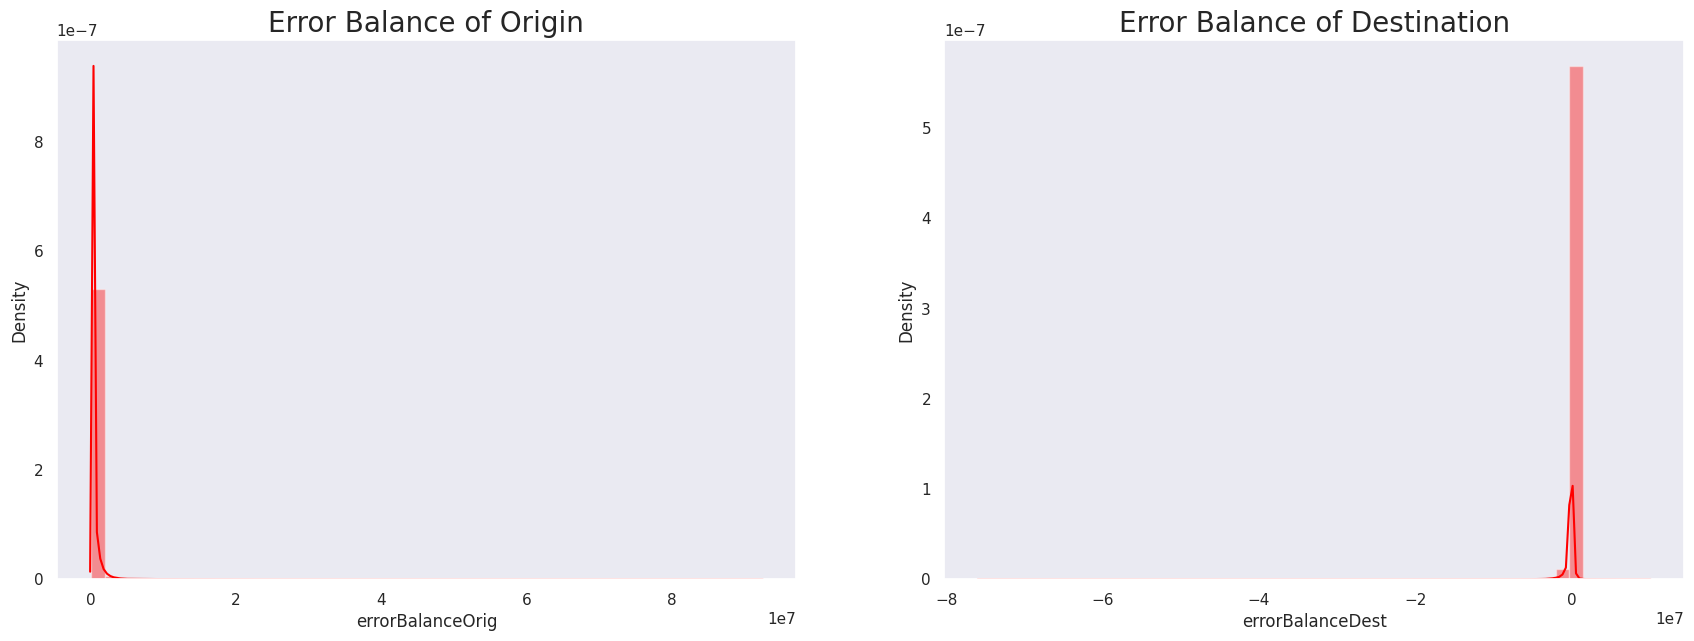

In [41]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

In [43]:
X['isFraud'].value_counts()

,count
isFraud,
0,2762196
1,8213


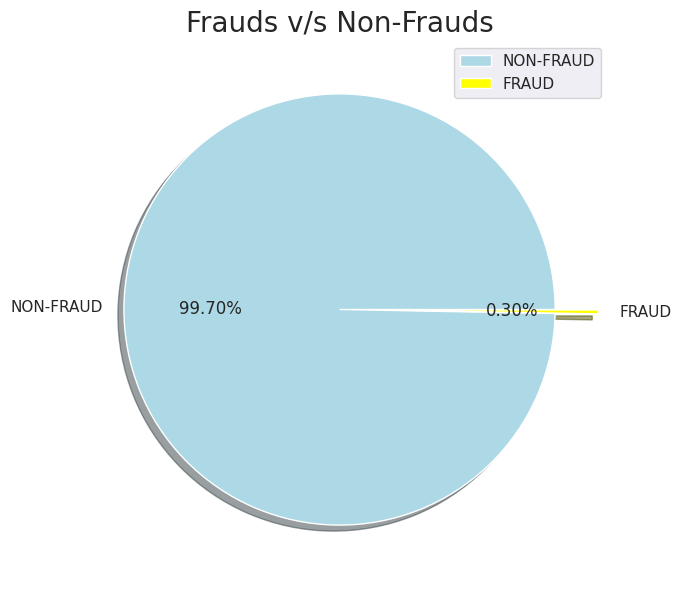

In [45]:
X['isFraud'].value_counts()
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [46]:
X['isFraud'].value_counts()

,count
isFraud,
0,2762196
1,8213


In [47]:

# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [48]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


**OVER-SAMPLING**

In [52]:
pip install imbalanced-learn

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X, Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


In [56]:

# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [57]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modelling using Xg-Boost Model**

In [58]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9984922734624402


In [59]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[552454    666]
 [   333 551426]]
